In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from PIL import Image
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fetch_data(train_size, test_size):
    train_data = datasets.MNIST(
        'data', train=True, download=True,
        transform=transforms.Compose([transforms.ToTensor()])
    )
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=train_size, shuffle=True)

    test_data = datasets.MNIST(
        'data', train=False, download=True,
        transform=transforms.Compose([transforms.ToTensor()])
    )
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=test_size, shuffle=True)

    return train_loader, test_loader


In [3]:
class CustomModel(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(CustomModel, self).__init__()
        self.layers = nn.ModuleList()

        self.layers.append(nn.Linear(input_size, hidden_sizes[0]))

        for i in range(len(hidden_sizes) - 1):
            self.layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i + 1]))

        self.layers.append(nn.Linear(hidden_sizes[-1], output_size))

    def forward(self, x):
        for layer in self.layers[:-1]:
            x = F.relu(layer(x))
        x = self.layers[-1](x)
        return x


In [4]:
train_loader, test_loader = fetch_data(50, 100)
epochs = 10


In [5]:
def calc_params(model):
    return sum(param.numel() for param in model.parameters())

def define_optimizer(model):
    return torch.optim.Adam(model.parameters(), lr=0.0001)


In [6]:
def train(model, optimizer, train_loader, loss_fn):
    model.train()

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()

        # Forward propagation
        output = model(data.view(-1, 784))
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

In [7]:
def calculate_loss(model, loader, loss_fn):
    correct = 0
    total = 0
    total_cost = 0
    cost_counter = 0
    
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data.view(-1, 784))  # Flatten the input data
            loss = loss_fn(output, target)
            total_cost += loss.item()  # Convert tensor loss to scalar
            cost_counter += 1

            # Calculate correct predictions
            predicted = torch.argmax(output, dim=1)
            correct += (predicted == target).sum().item()
            total += target.size(0)  # Total number of samples

    avg_cost = total_cost / cost_counter
    accuracy = round(correct / total, 3)
    
    return avg_cost, accuracy


In [8]:
def compute(model, optimizer):
    loss_fn = torch.nn.CrossEntropyLoss()
    
    for epoch in range(1, epochs + 1):
        train(model, optimizer, train_loader, loss_fn)  # Perform training step
        train_loss, train_acc = calculate_loss(model, train_loader, loss_fn)  # Compute train loss and accuracy
        test_loss, test_acc = calculate_loss(model, test_loader, loss_fn)  # Compute test loss and accuracy

        # Track results across epochs
        loss_train_arr.append(train_loss)
        loss_test_arr.append(test_loss)
        param_arr.append(calc_params(model))
        train_acc_arr.append(train_acc)
        test_acc_arr.append(test_acc)

        # Output results for current epoch
        print(f"Epoch {epoch}:")
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.3f}")
        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.3f}")


In [9]:
# Initialize models with varying hidden layer sizes
model_list = [
    CustomModel(784, [5, 9], 10),
    CustomModel(784, [25, 50], 10),
    CustomModel(784, [50, 100], 10),
    CustomModel(784, [60, 120], 10),
    CustomModel(784, [100, 200], 10),
    CustomModel(784, [150, 300], 10),
    CustomModel(784, [200, 400], 10),
    CustomModel(784, [250, 500], 10),
    CustomModel(784, [280, 560], 10),
    CustomModel(784, [350, 600], 10)
]

# Initialize lists for tracking metrics
loss_train_arr = []
loss_test_arr = []
param_arr = []
test_acc_arr = []
train_acc_arr = []

# Train each model in the list
for idx, model in enumerate(model_list):
    torch.manual_seed(1)  # Set the seed for reproducibility
    print(f"Model {idx + 1} parameters: {calc_params(model)}")
    
    optimizer = define_optimizer(model)
    compute(model, optimizer)


Model 1 parameters: 4079
Epoch 1:
Train Loss: 1.6030, Train Accuracy: 0.556
Test Loss: 1.5975, Test Accuracy: 0.550
Epoch 2:
Train Loss: 1.0104, Train Accuracy: 0.731
Test Loss: 1.0085, Test Accuracy: 0.731
Epoch 3:
Train Loss: 0.7894, Train Accuracy: 0.771
Test Loss: 0.7845, Test Accuracy: 0.780
Epoch 4:
Train Loss: 0.6890, Train Accuracy: 0.797
Test Loss: 0.6825, Test Accuracy: 0.806
Epoch 5:
Train Loss: 0.6309, Train Accuracy: 0.815
Test Loss: 0.6241, Test Accuracy: 0.824
Epoch 6:
Train Loss: 0.5935, Train Accuracy: 0.825
Test Loss: 0.5870, Test Accuracy: 0.835
Epoch 7:
Train Loss: 0.5665, Train Accuracy: 0.833
Test Loss: 0.5603, Test Accuracy: 0.840
Epoch 8:
Train Loss: 0.5467, Train Accuracy: 0.839
Test Loss: 0.5412, Test Accuracy: 0.846
Epoch 9:
Train Loss: 0.5291, Train Accuracy: 0.845
Test Loss: 0.5233, Test Accuracy: 0.849
Epoch 10:
Train Loss: 0.5157, Train Accuracy: 0.848
Test Loss: 0.5104, Test Accuracy: 0.853
Model 2 parameters: 21435
Epoch 1:
Train Loss: 0.5625, Train Acc

In [10]:
temp_1 = []
for i in loss_train_arr:
    temp_1.append(i)  # Assuming i is already a float, no need for .data.numpy()

temp_2 = []
for i in loss_test_arr:
    temp_2.append(i)  # Assuming i is already a float, no need for .data.numpy()


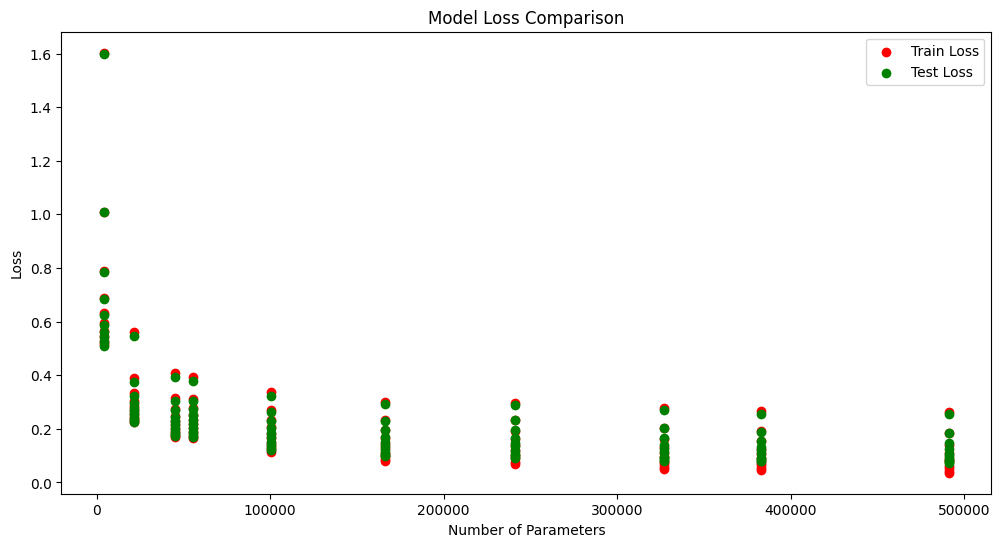

In [11]:
plt.figure(figsize=(12, 6))
plt.scatter(param_arr, temp_1, color="r")
plt.scatter(param_arr, temp_2, color="g")
plt.title('Model Loss Comparison')
plt.legend(['Train Loss', 'Test Loss'])
plt.xlabel('Number of Parameters')
plt.ylabel('Loss')
plt.show()


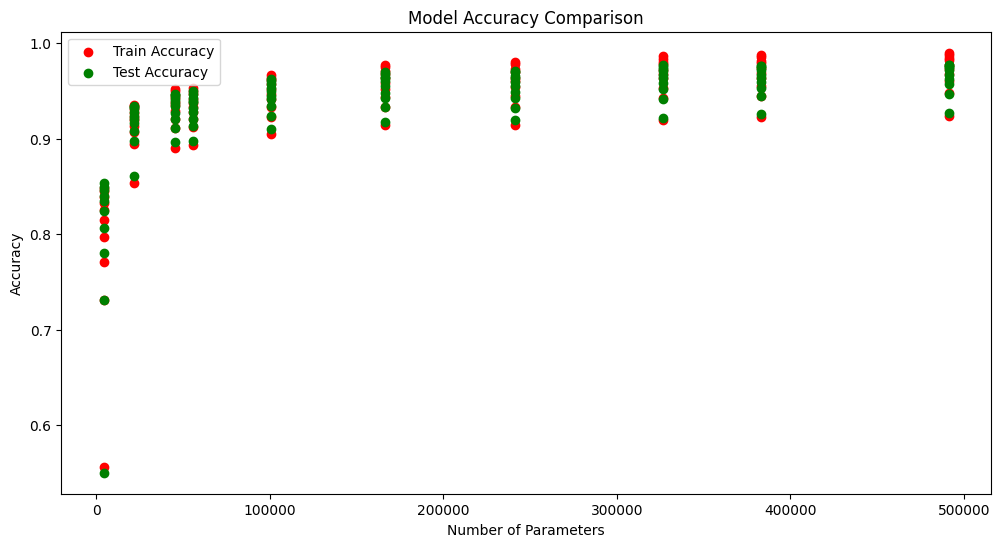

In [12]:
plt.figure(figsize=(12, 6))
plt.scatter(param_arr, train_acc_arr, color="r")
plt.scatter(param_arr, test_acc_arr, color="g")
plt.title('Model Accuracy Comparison')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.xlabel('Number of Parameters')
plt.ylabel('Accuracy')
plt.show()
